# 1: Prime numbers

In [31]:
# function to check if number is prime
def is_prime(x):
    if x < 2:
        return False
    for n in range(2, int(x**0.5)+1):
        if x % n == 0:
            return False
    return True

# function to count primes in a list of numbers
def count_primes(numbers):
    count = 0
    for n in numbers:
        if is_prime(n):
            count += 1
        else: 
            count += 0
    return count

## a) How many of the numbers between 1 and 100 are prime?

In [32]:
# make list of and count primes of numbers 1 to 100
list_1 = []
for n in range (1, 101):
    list_1.append(n)

print(count_primes(list_1))

25


## b) How many of the first 10 numbers (2ⁿ − 1 for n=[1...10]) are prime?

In [33]:
# make list of and count primes of first 10 numbers 2^n-1 for n=[1...10]
list_2 = []
for n in range(1, 11):
    list_2.append((2**n)-1)

print(count_primes(list_2))

4


# 2: Gaussian distribution

In [34]:
import numpy as np
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Gaussian function (numeric, using numpy)
def gaussian(c, x, x_bar, delta_x):
    return c * np.exp(-(x-x_bar)**2 / (2 * delta_x **2))

## a) Use the values c=1, xbar=0, and delta_x=1 to plot the distribution.

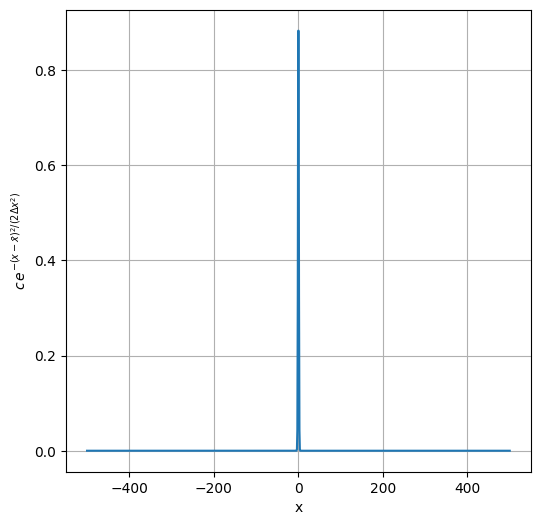

In [35]:
# plotting Gaussian (numeric)
x_values = np.linspace(-500, 500, 1000)

plt.figure(figsize=(6, 6))

plt.plot(x_values, gaussian(1, x_values, 0, 1))
plt.xlabel("x")
plt.ylabel(r"$c \, e^{-(x - \bar{x})^2 / (2 \Delta x^2)}$")
plt.grid(True)
plt.show()

## b) Plot this function with a few other values xbar and delta_x. How do these parameters change the distribution?

In [36]:
# plotting function
def plot_gauss(c=1, x_bar=0, delta_x=1):
    clear_output(wait=True)
    x_values = np.linspace(-500, 500, 1000)
    y_values = gaussian(c, x_values, x_bar, delta_x)
    plt.figure(figsize=(6, 6))  
    plt.plot(x_values, y_values)
    plt.xlabel("x")
    plt.ylabel(r"$c \, e^{-(x - \bar{x})^2 / (2 \Delta x^2)}$")
    plt.grid(True)
    plt.show()

interact(
    plot_gauss,
    x_bar=FloatSlider(value=0, min=-200, max=200, step=1),
    delta_x=FloatSlider(value=1, min=1, max=50, step=1)
)

interactive(children=(IntSlider(value=1, description='c', max=3, min=-1), FloatSlider(value=0.0, description='…

<function __main__.plot_gauss(c=1, x_bar=0, delta_x=1)>

## c) Find the value of *c* in terms of delta_x so that the distribution is normalized. 

In [37]:
import sympy as sp
from IPython.display import display
xbar = 0
x = sp.symbols('x', real=True)
dx = sp.symbols('dx', positive=True, real=True)

gaussian_unnorm = sp.exp(-(x-xbar)**2 / (2 * dx **2))
integral = sp.integrate(gaussian_unnorm, (x, -sp.oo, sp.oo))

c = 1 / integral

display(sp.simplify(c))

sqrt(2)/(2*sqrt(pi)*dx)

## d) Find what fraction of the distribution is within +/-2.5 delta_x of the mean

In [38]:
gaussian_norm = c * sp.exp(-(x-xbar)**2 / (2 * dx **2))

area = sp.integrate(gaussian_norm, (x, -2.5*dx, 2.5*dx))
display(float(sp.simplify(area)))

0.9875806693484477

# 3: Dice

## a) Simulate a game by choosing 1000 triplets of random integers, each between 1 and 6. Plot the distribution of the sum of the dice.

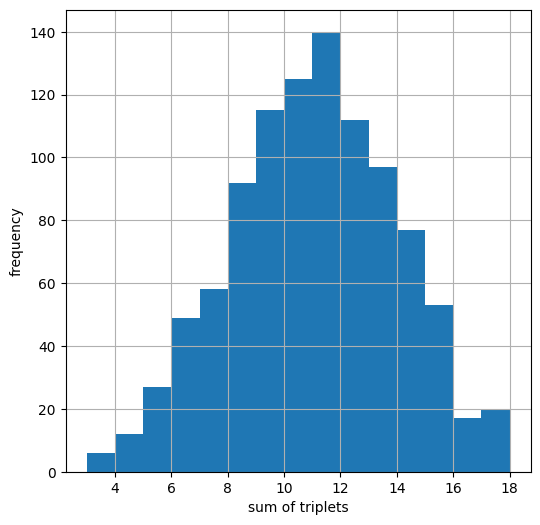

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# generate random rolls of 3 dice (1000 trials)
rolls = np.random.randint(1, 7, size=(1000, 3))

# sum up each result in the trials
sums = np.sum(rolls, axis=1)

# create histogram
plt.figure(figsize=(6, 6))
counts, bin_edges, patches = plt.hist(sums, bins=np.arange(3, 18 + 1))
plt.xlabel("sum of triplets")
plt.ylabel("frequency")
plt.grid(True)
plt.show()

## b) Simulate many such games to find, on average, how many times you expect to roll a triple-6 in a game.

In [40]:
# simulating multiple games to find average
num_games = 10000
count = []
for n in range(num_games):
    rolls = np.random.randint(1, 7, size=(1000, 3))
    triple_6 = np.all(rolls == 6, axis=1)
    count.append(np.sum(triple_6))

average_triple6 = np.mean(count)
print("simulated average triple-6 per game:", average_triple6)

simulated average triple-6 per game: 4.6166


## c) Show that the average number of triple-6 rolls found in (b) matches what you expect theoretically.

In [41]:
# theoretical calculation of average of getting triple 6
probability = (1/6) ** 3
num_rolls = 1000
print(f"theoretical average of triple 6 : {probability * num_rolls}")

theoretical average of triple 6 : 4.629629629629629
